In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Debernardi et al 2020 data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

In [5]:
df.describe()

,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
count,590.000000,590.000000,350.000000,590.000000,590.000000,590.000000,590.000000,306.000000
mean,59.079661,2.027119,654.002944,0.855383,3.063530,111.774090,597.868722,735.281222
std,13.109520,0.804873,2430.317642,0.639028,3.438796,196.267110,1010.477245,1477.247724
min,26.000000,1.000000,0.000000,0.056550,0.000129,0.001104,0.005293,0.000000
25%,50.000000,1.000000,8.000000,0.373230,0.167179,10.757216,43.961000,80.692000
50%,60.000000,2.000000,26.500000,0.723840,1.649862,34.303353,259.873974,208.538500
75%,69.000000,3.000000,294.000000,1.139482,5.205037,122.741013,742.736000,649.000000
max,89.000000,3.000000,31000.000000,4.116840,23.890323,1403.897600,13344.300000,13200.000000


In [6]:
df.isnull().sum()

,0
sample_id,0
patient_cohort,0
sample_origin,0
age,0
sex,0
diagnosis,0
stage,391
benign_sample_diagnosis,382
plasma_CA19_9,240
creatinine,0


<Axes: xlabel='diagnosis'>

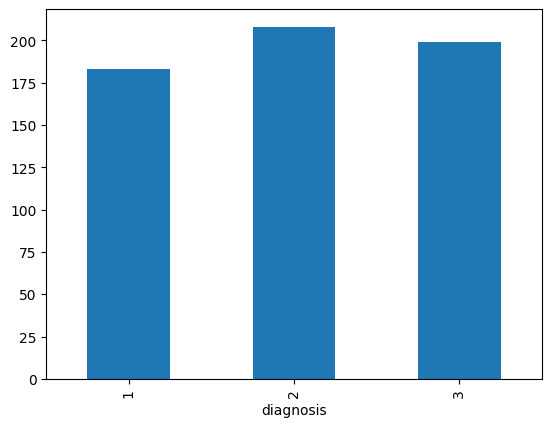

In [7]:
(df.groupby('diagnosis')
   ['sample_id'].nunique()
   .plot.bar()
)

In [8]:
df=df.drop("sample_id",axis=1)

In [9]:
df["patient_cohort"].unique()

array(['Cohort1', 'Cohort2'], dtype=object)

In [10]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['patient_cohort']= label_encoder.fit_transform(df['patient_cohort'])

In [11]:
df['patient_cohort']=df['patient_cohort'].astype(int)

In [12]:
df['sample_origin'].unique()

array(['BPTB', 'LIV', 'ESP', 'UCL'], dtype=object)

In [13]:
df['sample_origin']= label_encoder.fit_transform(df['sample_origin'])
df['sample_origin']=df['sample_origin'].astype(int)

In [14]:
df['sex']= label_encoder.fit_transform(df['sex'])
df['sex']=df['sex'].astype(int)

In [15]:
df['diagnosis'].unique()
df['stage']=df['stage'].fillna('0')
df['stage'].unique()
df['stage']= label_encoder.fit_transform(df['stage'])
df['stage']=df['stage'].astype(int)
df['benign_sample_diagnosis'].unique()

array([nan, 'Abdominal Pain ', 'Biliary Stricture (Secondary to Stent) ',
       'Cholecystitis', 'Cholecystitis ', 'Cholecystitis (Chronic) ',
       'Cholecystitis (Chronic) Cholelithiasis',
       'Cholecystitis (Chronic) Cholesterolsis', 'Choledochal Cyst ',
       'Choledocholiathiasis', 'Choledocholiathiasis ',
       'Cholelithiasis with adenomyomatous hyperplasia ',
       'Duodenal Stricture', 'Duodenitis', 'Gallbladder polyps ',
       'Gallbladder Porcelain', 'Gallstones', 'Gallstones ',
       'Gallstones - Incidental ', 'Gastritis ', 'Gastritis and Reflux ',
       'Ill defined lesion in uncinate process',
       'Ischaemic Common Bile Duct Stricture',
       'Pancreatitis (Pseudocyst)', 'Pancreatitis', 'Pancreatitis ',
       'Pancreatitis (Abscess)', 'Pancreatitis (Acute)',
       'Pancreatitis (Alcohol-Chronic-Pseuodcyst)',
       'Pancreatitis (Alcohol-Chronic)', 'Pancreatitis (Alcohol)',
       'Pancreatitis (Autoimmune) ', 'Pancreatitis (Chronic-Pseudocyst) ',
      

In [16]:
df['benign_sample_diagnosis']=df['benign_sample_diagnosis'].fillna("null")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   patient_cohort           590 non-null    int64  
 1   sample_origin            590 non-null    int64  
 2   age                      590 non-null    int64  
 3   sex                      590 non-null    int64  
 4   diagnosis                590 non-null    int64  
 5   stage                    590 non-null    int64  
 6   benign_sample_diagnosis  590 non-null    object 
 7   plasma_CA19_9            350 non-null    float64
 8   creatinine               590 non-null    float64
 9   LYVE1                    590 non-null    float64
 10  REG1B                    590 non-null    float64
 11  TFF1                     590 non-null    float64
 12  REG1A                    306 non-null    float64
dtypes: float64(6), int64(6), object(1)
memory usage: 60.0+ KB


In [19]:
df.isnull().sum()

,0
patient_cohort,0
sample_origin,0
age,0
sex,0
diagnosis,0
stage,0
benign_sample_diagnosis,0
plasma_CA19_9,240
creatinine,0
LYVE1,0


In [20]:
df['plasma_CA19_9']=df['plasma_CA19_9'].fillna(df['plasma_CA19_9'].mean())
df['REG1A']=df['REG1A'].fillna(df['REG1A'].mean())
df=df.drop("benign_sample_diagnosis",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_cohort  590 non-null    int64  
 1   sample_origin   590 non-null    int64  
 2   age             590 non-null    int64  
 3   sex             590 non-null    int64  
 4   diagnosis       590 non-null    int64  
 5   stage           590 non-null    int64  
 6   plasma_CA19_9   590 non-null    float64
 7   creatinine      590 non-null    float64
 8   LYVE1           590 non-null    float64
 9   REG1B           590 non-null    float64
 10  TFF1            590 non-null    float64
 11  REG1A           590 non-null    float64
dtypes: float64(6), int64(6)
memory usage: 55.4 KB


In [21]:
X=df.drop("diagnosis",axis=1)
y=df['diagnosis']

In [22]:
corr_matrix = X.corr()
corr_matrix = corr_matrix.abs().unstack()
corr_matrix = corr_matrix.sort_values(ascending=False)
corr_matrix = corr_matrix[corr_matrix >= 0.8]
corr_matrix = corr_matrix[corr_matrix < 1]
corr_matrix = pd.DataFrame(corr_matrix).reset_index()
corr_matrix.columns = ['feature1', 'feature2', 'Correlation']
corr_matrix.head()

,feature1,feature2,Correlation


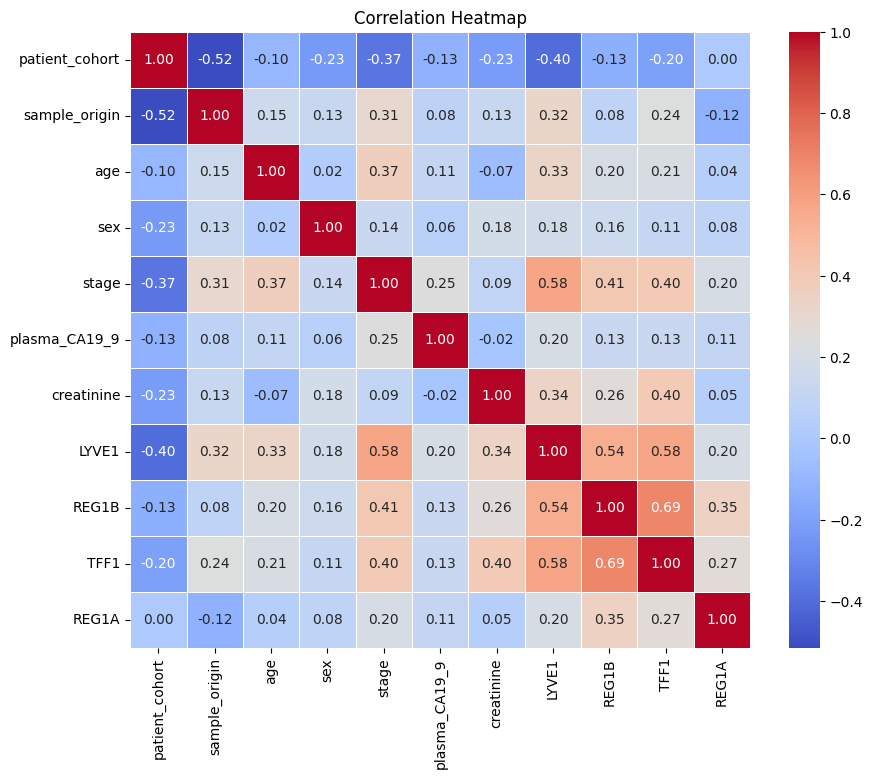

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [25]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

y= label_encoder.fit_transform(y)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg) * 100

print()
print("Logistic Regression")
print(f"Accuracy: {accuracy_log_reg:.2f}%")


Logistic Regression
Accuracy: 72.82%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred_log_reg, average='macro')

(0.7342071579776498, 0.7406695156695157, 0.7368751774682476, None)

In [27]:
from sklearn.metrics import accuracy_score
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)*100))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 709
[LightGBM] [Info] Number of data points in the train set: 395, number of used features: 11
[LightGBM] [Info] Start training from score -1.208201
[LightGBM] [Info] Start training from score -1.066231
[LightGBM] [Info] Start training from score -1.030126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [28]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.8832403832403832, 0.8824074074074074, 0.8827054794520549, None)

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
y_pred8 = clf.predict(X_test)
from sklearn import metrics
print()
print( metrics.accuracy_score(y_test, y_pred8)*100)


86.66666666666667


In [30]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred8, average='macro')

(0.8741012366983032, 0.8721509971509972, 0.8726583726583726, None)

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100,max_depth=6,min_samples_split=2,min_weight_fraction_leaf =0.0,n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test)*100)
y_pred9 = clf.predict(X_test)

88.2051282051282


In [32]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred9, average='macro')

(0.8879138127853882, 0.8875356125356125, 0.8876949122338056, None)

In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier(eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print(accuracy*100)

86.66666666666667


In [34]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred1, average='macro')

(0.8734448734448734, 0.8726495726495727, 0.8729309360730593, None)

In [37]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100

print()
print("Support Vector Machine")
print(f"Accuracy: {accuracy_svm:.2f}%")



Support Vector Machine
Accuracy: 50.26%


In [38]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred_svm, average='macro')

(0.5030455655455656, 0.5135327635327636, 0.48078287659543895, None)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn) * 100

# Print results
print()
print("K-Nearest Neighbors")
print(f"Accuracy: {accuracy_knn:.2f}%")



K-Nearest Neighbors
Accuracy: 65.64%


In [40]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred_knn, average='macro')

(0.66720315280956, 0.6584905196974162, 0.6600998161281849, None)

In [41]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred_decision_tree = decision_tree.predict(X_test)

accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree) * 100

print()
print("Decision Tree Classifier")
print(f"Accuracy: {accuracy_decision_tree:.2f}%")


Decision Tree Classifier
Accuracy: 86.67%


In [42]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred_decision_tree, average='macro')

(0.8731481481481481, 0.8731481481481481, 0.8731481481481481, None)

In [43]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(n_estimators=100)
ada_boost.fit(X_train, y_train)

y_pred_ada_boost = ada_boost.predict(X_test)


accuracy_ada_boost = accuracy_score(y_test, y_pred_ada_boost) * 100

# Print results
print()
print("AdaBoost Classifier")
print(f"Accuracy: {accuracy_ada_boost:.2f}%")



AdaBoost Classifier
Accuracy: 83.08%


In [44]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred_ada_boost, average='macro')

(0.839041095890411, 0.8387464387464387, 0.8388666132050254, None)